<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Inspection-of-data" data-toc-modified-id="Inspection-of-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspection of data</a></span><ul class="toc-item"><li><span><a href="#Offers" data-toc-modified-id="Offers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Offers</a></span></li><li><span><a href="#Customers" data-toc-modified-id="Customers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Customers</a></span></li><li><span><a href="#Events/Transcripts" data-toc-modified-id="Events/Transcripts-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Events/Transcripts</a></span><ul class="toc-item"><li><span><a href="#Transaction-summary-of-every-customer" data-toc-modified-id="Transaction-summary-of-every-customer-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Transaction summary of every customer</a></span></li><li><span><a href="#Aggregate-person-and-offer-history" data-toc-modified-id="Aggregate-person-and-offer-history-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Aggregate person and offer history</a></span></li></ul></li></ul></li><li><span><a href="#Represent-customers-with-their-offer-events" data-toc-modified-id="Represent-customers-with-their-offer-events-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Represent customers with their offer events</a></span><ul class="toc-item"><li><span><a href="#Merge-various-datasets" data-toc-modified-id="Merge-various-datasets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Merge various datasets</a></span></li><li><span><a href="#Remove-missing-values-and-spurious-values" data-toc-modified-id="Remove-missing-values-and-spurious-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Remove missing values and spurious values</a></span></li><li><span><a href="#Remove-informationals-and-label-the-target-variable" data-toc-modified-id="Remove-informationals-and-label-the-target-variable-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Remove informationals and label the target variable</a></span></li><li><span><a href="#Target-varibales-Vs-our-features" data-toc-modified-id="Target-varibales-Vs-our-features-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Target varibales Vs our features</a></span></li><li><span><a href="#Split-train-and-test" data-toc-modified-id="Split-train-and-test-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Split train and test</a></span></li></ul></li><li><span><a href="#binary-classification:-random-forest" data-toc-modified-id="binary-classification:-random-forest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>binary classification: random forest</a></span><ul class="toc-item"><li><span><a href="#without-hyperparameter-tuning,-without-balanced-classifier" data-toc-modified-id="without-hyperparameter-tuning,-without-balanced-classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>without hyperparameter tuning, without balanced classifier</a></span></li><li><span><a href="#with-hyperparameter-tuning,-with-balanced-classifier" data-toc-modified-id="with-hyperparameter-tuning,-with-balanced-classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>with hyperparameter tuning, with balanced classifier</a></span></li></ul></li><li><span><a href="#ToDos" data-toc-modified-id="ToDos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ToDos</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Findings</a></span><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Model-generalises-across-training-and-test-data" data-toc-modified-id="Model-generalises-across-training-and-test-data-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Model generalises across training and test data</a></span></li><li><span><a href="#Area-under-curve" data-toc-modified-id="Area-under-curve-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Area under curve</a></span></li></ul></li></ul></li></ul></div>

## Setup

In [1]:
import itertools
import json
import random
from itertools import groupby

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (auc, average_precision_score,
                             classification_report, confusion_matrix,
                             plot_confusion_matrix, precision_recall_curve,
                             roc_curve)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100  # 200 e.g. is really fine, but slower

%matplotlib inline
sns.set_style("whitegrid")


def plot_roc_curve(y_test, probs):
    """
    Plots the ROC curve
    """
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, lw=1)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")

Using TensorFlow backend.


## Data

In [70]:
offers = pd.read_json('data_js/portfolio.json', lines=True)
customers = pd.read_json('data_js/profile.json', lines=True)
events = pd.read_json('data_js/transcript.json', lines=True)

## Inspection of data 

### Offers

Assign all channels of the offer camgains via columns

In [3]:
offers["web"] = None
offers["email"] = None
offers["mobile"] = None
offers["social"] = None

In [4]:
for i in offers.index:
    channels = offers.channels[i]
    for c in channels:
        offers[str(c)][i] = 1

/Users/mean-machine/miniconda/envs/demand/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
offers = offers.fillna(value=int(0))

In [6]:
ProfileReport(offers)

### Customers

In [7]:
ProfileReport(customers)

In [8]:
customers.became_member_on = pd.to_datetime(
    customers.became_member_on, format="%Y%m%d")

In [9]:
customers['year_since_member'] = customers.became_member_on.dt.year

In [10]:
import datetime
customers['days_since_member'] = (
    datetime.datetime.now() - customers.became_member_on).dt.days

<Figure size 864x504 with 0 Axes>

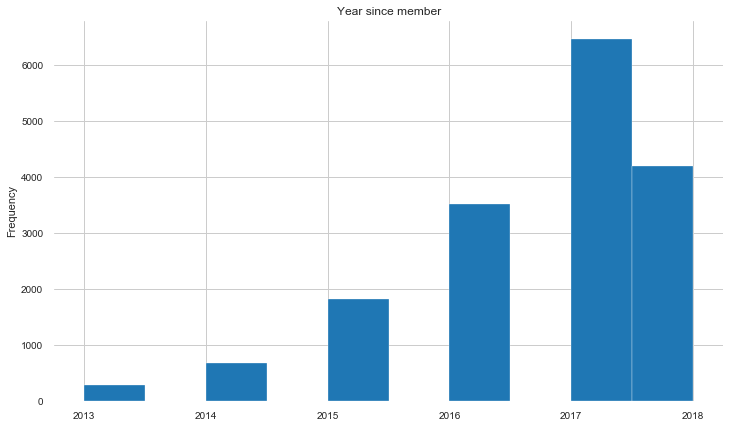

In [11]:
plt.figure(figsize=(12, 7))
customers.year_since_member.plot(kind='hist', title="Year since member")

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'age')

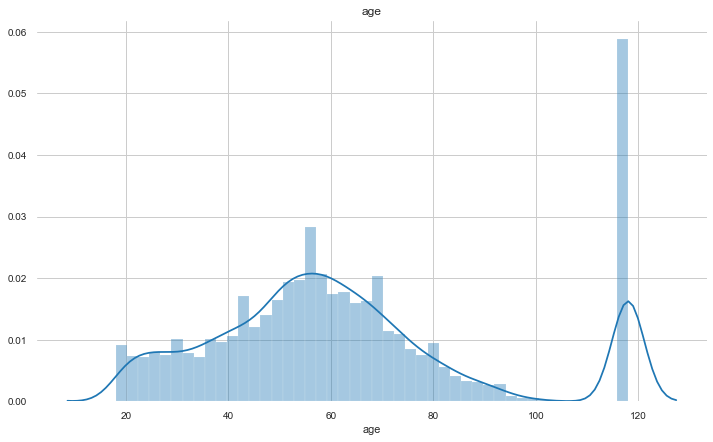

In [12]:
plt.figure(figsize=(12, 7))
sns.distplot(customers.age)
plt.title("age")

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'age: cumulative distribution')

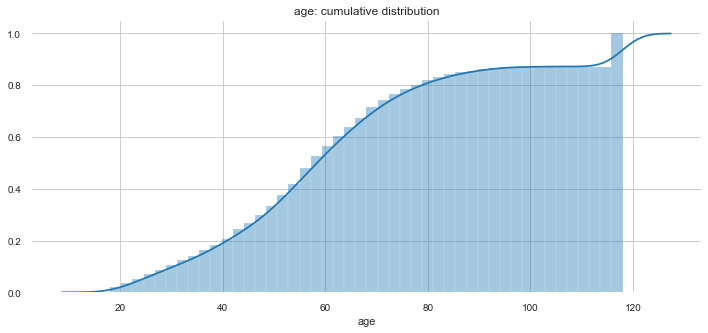

In [13]:
plt.figure(figsize=(12, 5))
kwargs = {'cumulative': True}
sns.distplot(customers.age, hist_kws=kwargs, kde_kws=kwargs)
plt.title("age: cumulative distribution")

Age 118 (~15% customers) looks to be a data quality concern, as this number seems like a placeholder/default value. Since this is a numeric feature -- it could affect our model. We should mark it as a missing value. 

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'income: cumulative distribution')

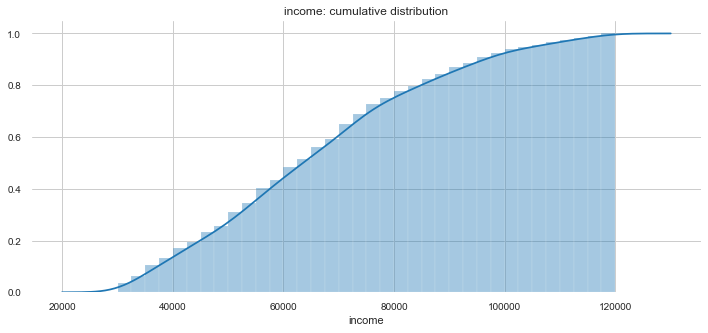

In [14]:
plt.figure(figsize=(12, 5))
kwargs = {'cumulative': True}
sns.distplot(customers.income, hist_kws=kwargs, kde_kws=kwargs)
plt.title("income: cumulative distribution")

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Gender')

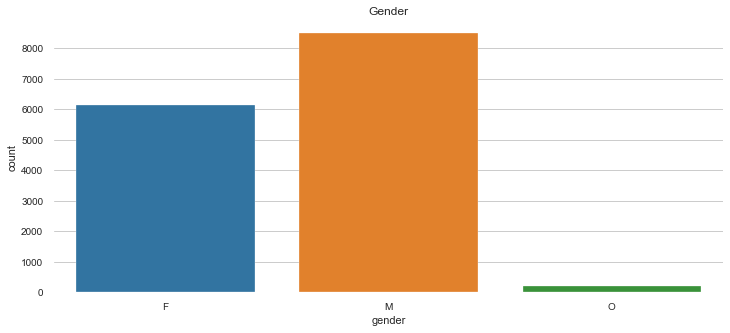

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(customers.gender)
plt.title("Gender")

### Events/Transcripts

In [71]:
events.sample(3).T

,77920,1683,75076
person,03c0b69b3db24c70bba1622bc8dd8459,9bfcb9551d364ef89f928f6ef195318d,630397a8eb8e48bc8169767588897b22
event,transaction,offer received,offer completed
value,{'amount': 5.11},{'offer id': '2906b810c7d4411798c6938adc9daaa5'},{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
time,192,0,186


The value column is a dictionary, we would like to extract the key value pairs into columns. 

In [72]:
new_columns = pd.json_normalize(events.value)

# convert to string, replace 'nan' with '' and concatenate columns to get one offer_id column
new_columns.offer_id = new_columns.offer_id.astype(str)
new_columns.offer_id = new_columns.offer_id.replace('nan', '')

new_columns['offer id'] = new_columns['offer id'].astype(str)
new_columns['offer id'] = new_columns['offer id'].replace('nan', '')

In [73]:
new_columns.offer_id = new_columns['offer_id'] + new_columns['offer id']
events = pd.concat((events, new_columns), axis=1)
events.sample(3).T

,43235,245777,150381
person,4de38d89a91c4286a583085d909817f9,58b96ca152d946e98090e277a183e08f,2c59e2f53601408b9ac19d1ee5183dd4
event,transaction,offer received,transaction
value,{'amount': 4.6},{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},{'amount': 20.79}
time,108,576,402
offer id,,f19421c1d4aa40978ebb69ca19b0e20d,
amount,4.6,NaN,20.79
offer_id,,f19421c1d4aa40978ebb69ca19b0e20d,
reward,NaN,NaN,NaN


<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Event vs Time lapsed')

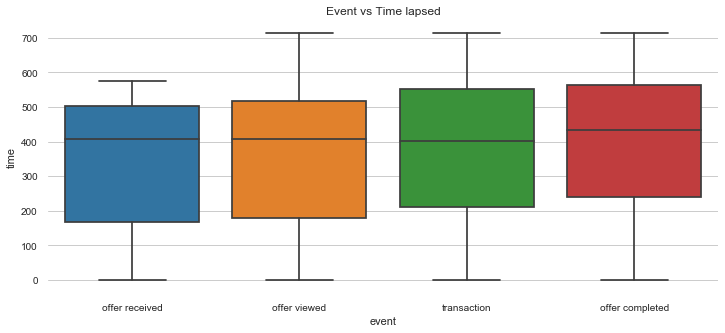

In [75]:
plt.figure(figsize=(12, 5))
sns.boxplot(events.event, events.time)
plt.title("Event vs Time lapsed")

<Figure size 1296x576 with 0 Axes>

Text(0.5, 1.0, 'Time lapsed')

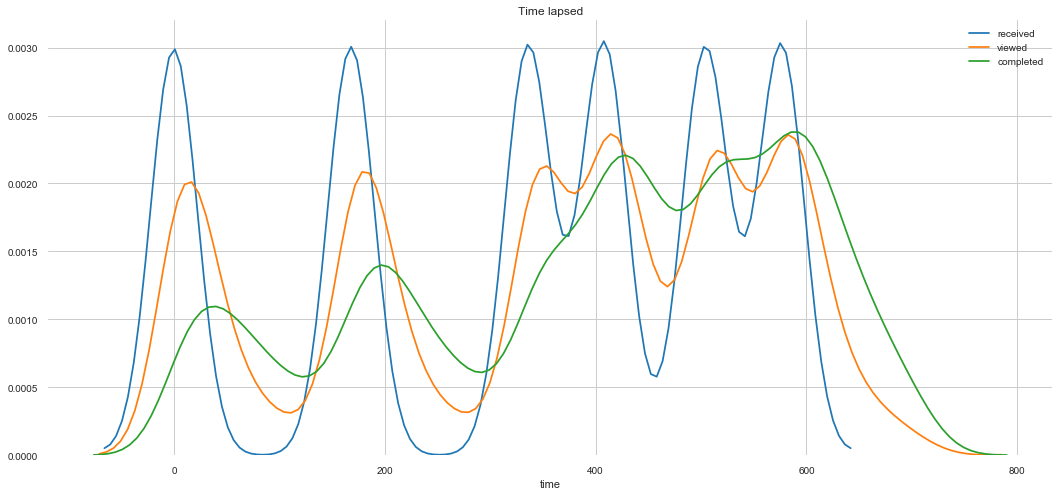

In [80]:
plt.figure(figsize=(18, 8))
sns.distplot(events.time[events.event=="offer received"], hist=False, label="received")
sns.distplot(events.time[events.event=="offer viewed"], hist=False, label="viewed")
sns.distplot(events.time[events.event=="offer completed"], hist=False, label="completed")
plt.title("Time lapsed")

In [19]:
events.drop(['value', 'time', 'offer id'], inplace=True, axis=1)

#### Transaction summary of every customer

In [20]:
transactions = events[events.event == "transaction"]
transactions_summary = transactions.groupby('person').agg(count_transactions=('event', 'count'),
                                                          total_spend=('amount', 'sum'))
transactions_summary.reset_index(inplace=True)
transactions_summary.sample(3).T

,15287,10081,5677
person,eb6e7362033f4651b0406e33e57badf5,9a9ce5c7b24c4728af3c659f4069b77c,5761c67b1cbc46bb812b5c47bfbfb787
count_transactions,11,10,4
total_spend,30.11,97.23,93.64


#### Aggregate person and offer history

In [21]:
offer_events = events[events.event != "transaction"]

offer_events_summary = offer_events.groupby(
    ['person', 'offer_id', 'event']).agg(total_reward=('reward', 'sum'))
offer_events_summary.reset_index(inplace=True)

counts = offer_events.groupby(
    ['person', 'offer_id', 'event']).size().reset_index(name='event_counts')

offer_events_summary = pd.merge(offer_events_summary, counts, how="left", on=[
                                'person', 'offer_id', 'event'])

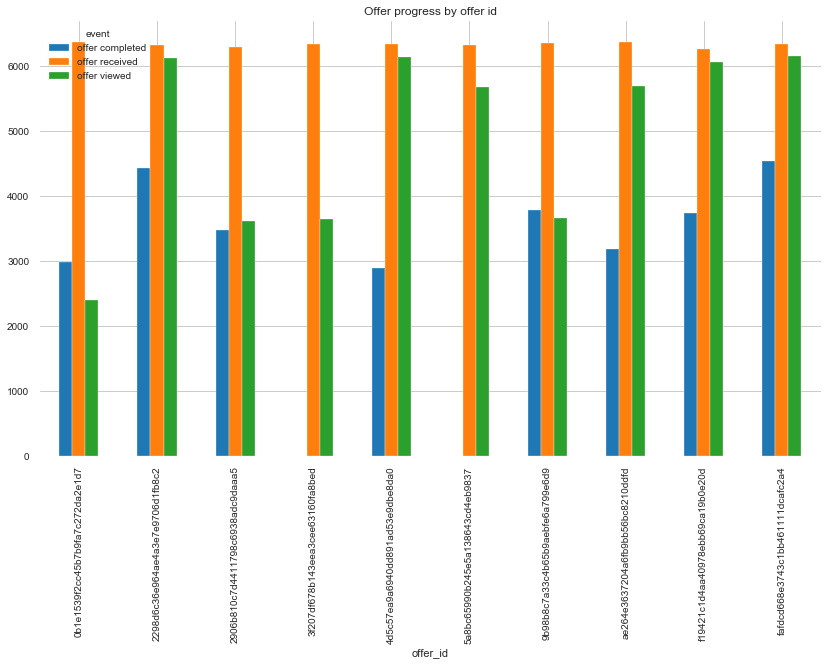

In [22]:
offer_events_summary.groupby(['event', 'offer_id'])['offer_id'].count().unstack(
    0).plot.bar(title="Offer progress by offer id", figsize=(14, 8))

## Represent customers with their offer events

### Merge various datasets
events, customers, offers, transactions summary, offer event summary

In [23]:
df = pd.merge(offer_events, customers, how="left",
              left_on="person", right_on="id")

In [24]:
df = pd.merge(df, offers, how="left", left_on="offer_id", right_on="id")

In [25]:
df = pd.merge(df, transactions_summary, how="left", on=["person"])
df = pd.merge(df, offer_events_summary, how="left",
              on=["person", "offer_id", "event"])

In [26]:
df.columns.tolist()

['person',
 'event',
 'amount',
 'offer_id',
 'reward_x',
 'gender',
 'age',
 'id_x',
 'became_member_on',
 'income',
 'year_since_member',
 'days_since_member',
 'reward_y',
 'channels',
 'difficulty',
 'duration',
 'offer_type',
 'id_y',
 'web',
 'email',
 'mobile',
 'social',
 'count_transactions',
 'total_spend',
 'total_reward',
 'event_counts']

We use the following features for our analysis:

- Identifiers: `person`, `offer_id`
- Target: `event`
- Continuous: `web`, `email`, `mobile`, `social`, `years_since_member`, `reward_y`, `difficulty`, `duration`, `income`, `age`, `days_since_member`, `count_transactions`, `total_spend`, `total_reward`, `event_counts`, `total_reward`
- Categorical: `offer_type`, `gender`

    

In [27]:
select_features = ['person',
                   'event',
                   'offer_id',
                   'gender',
                   'age',
                   'income',
                   'year_since_member',
                   'days_since_member',
                   'reward_y',
                   'difficulty',
                   'duration',
                   'offer_type',
                   'web',
                   'email',
                   'mobile',
                   'social',
                   'count_transactions',
                   'total_spend',
                   'event_counts']
df_model = df.copy()

In [28]:
df_model = df_model[select_features]

### Remove missing values and spurious values

In [29]:
(1 - df_model.count()/df_model.shape[0])*100

person                 0.000000
event                  0.000000
offer_id               0.000000
gender                11.204134
age                    0.000000
income                11.204134
year_since_member      0.000000
days_since_member      0.000000
reward_y               0.000000
difficulty             0.000000
duration               0.000000
offer_type             0.000000
web                    0.000000
email                  0.000000
mobile                 0.000000
social                 0.000000
count_transactions     2.012758
total_spend            2.012758
event_counts           0.000000
dtype: float64

In [30]:
# remove age=118
print("rows before", df_model.shape[0])
df_model = df_model[df_model.age != 118]
print("rows after remaining 118 age", df_model.shape[0])

rows before 167581
rows after remaining 118 age 148805


In [31]:
# remainig NAs
(1 - df_model.count()/df_model.shape[0])*100

person                0.000000
event                 0.000000
offer_id              0.000000
gender                0.000000
age                   0.000000
income                0.000000
year_since_member     0.000000
days_since_member     0.000000
reward_y              0.000000
difficulty            0.000000
duration              0.000000
offer_type            0.000000
web                   0.000000
email                 0.000000
mobile                0.000000
social                0.000000
count_transactions    1.758677
total_spend           1.758677
event_counts          0.000000
dtype: float64

We see that people without transaction history have missing values for those 2 columns, we should make those 0. 

In [32]:
df_model.fillna(0, inplace=True)

### Remove informationals and label the target variable
- As they do not get completed
- All offer events that are not completed are marked to be "not completed". That set basically comprises of offers received and/or viewed
- We can not remove the 'offers received' events from our final dataset as it is possible to: 
    - receive an offer, but never view or complete it : should be marked "not completed"

In [33]:
# remove informational campaigns for now, and label not completed offers as "not completed"
print("data size with informationals:", df_model.shape)
df_model = df_model[df_model.offer_type != "informational"]
print("data size without informationals:", df_model.shape)


#df_model = df_model[df_model.event!="offer received"]
#print("data size wihout events of receiving offers:", df_model.shape)

data size with informationals: (148805, 19)
data size without informationals: (126145, 19)


In [34]:
print("event counts before", df_model.event.value_counts())
df_model.event = df_model.event.replace('offer received', 'not completed')
df_model.event = df_model.event.replace('offer viewed', 'not completed')
print("event counts after", df_model.event.value_counts())

event counts before offer received     53201
offer viewed       40500
offer completed    32444
Name: event, dtype: int64
event counts after not completed      93701
offer completed    32444
Name: event, dtype: int64


In [35]:
# we mark the positive event (offer completion) as 1
df_model.event = np.where(df_model.event == "offer completed", 1, 0)

In [36]:
dummy_offertypes = pd.get_dummies(df_model.offer_type)
dummy_offerids = pd.get_dummies(df_model.offer_id)
dummy_gender = pd.get_dummies(df_model.gender)

df_model = pd.concat((df_model, dummy_gender), axis=1)
df_model = pd.concat((df_model, dummy_offerids), axis=1)
df_model = pd.concat((df_model, dummy_offertypes), axis=1)

df_model.columns.tolist()

['person',
 'event',
 'offer_id',
 'gender',
 'age',
 'income',
 'year_since_member',
 'days_since_member',
 'reward_y',
 'difficulty',
 'duration',
 'offer_type',
 'web',
 'email',
 'mobile',
 'social',
 'count_transactions',
 'total_spend',
 'event_counts',
 'F',
 'M',
 'O',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '2906b810c7d4411798c6938adc9daaa5',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 'fafdcd668e3743c1bb461111dcafc2a4',
 'bogo',
 'discount']

### Target varibales Vs our features

<Figure size 864x360 with 0 Axes>

(0, 600)

Text(0.5, 1.0, 'Offer completion Vs net spend so far')

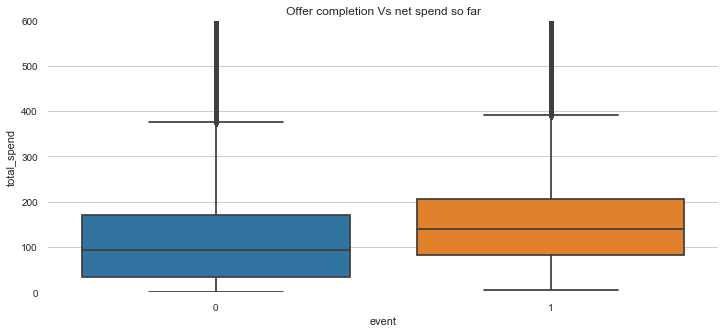

In [64]:
plt.figure(figsize=(12, 5))
sns.boxplot(df_model.event, df_model.total_spend)
plt.ylim(0, 600)
plt.title("Offer completion Vs net spend so far")

<Figure size 864x360 with 0 Axes>

(0, 25)

Text(0.5, 1.0, 'Offer completion Vs number of transactions so far')

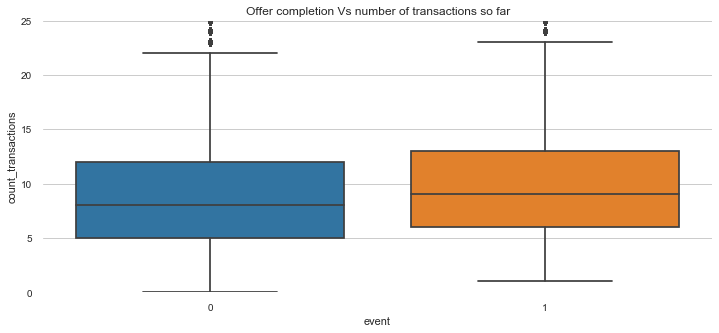

In [65]:
plt.figure(figsize=(12, 5))
sns.boxplot(df_model.event, df_model.count_transactions)
plt.ylim(0, 25)
plt.title("Offer completion Vs number of transactions so far")

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer completion Vs time length of customer history')

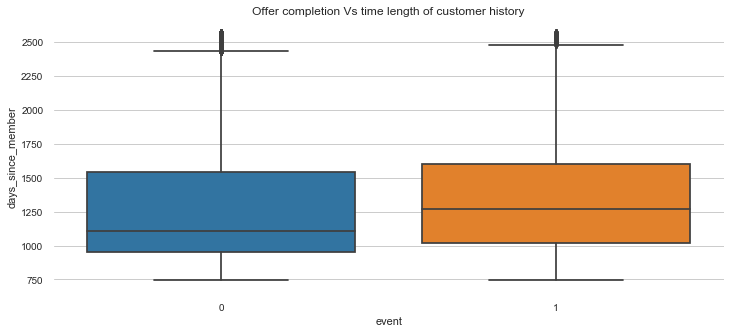

In [66]:
plt.figure(figsize=(12, 5))
sns.boxplot(df_model.event, df_model.days_since_member)
plt.title("Offer completion Vs time length of customer history")

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Offer completion Vs income')

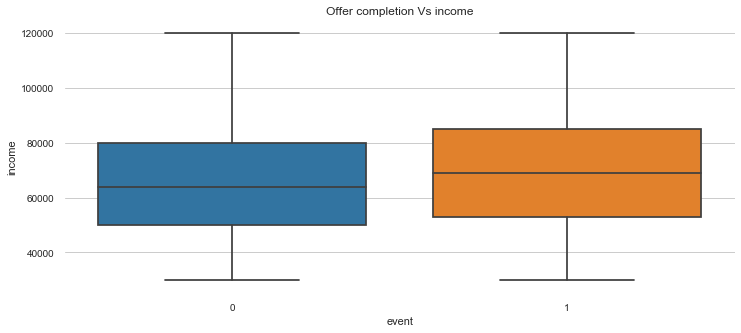

In [68]:
plt.figure(figsize=(12, 5))
sns.boxplot(df_model.event, df_model.income)
plt.title("Offer completion Vs income")

All of the above features show some deviation in mean across the two values of target variable (offer completion). This suggests that all of them explain some variance in offer completion but do not completely explain it on their own.

### Split train and test

In [38]:
df_train = df_model.sample(frac=0.7)
df_test = df_model.loc[~df_model.index.isin(df_train.index)]

target = 'event'
use_columns = [
    'age',
    'income',
    'year_since_member',
    'days_since_member',
    'reward_y',
    'difficulty',
    'duration',
    'web',
    'email',
    'mobile',
    'social',
    'count_transactions',
    'total_spend',
    'event_counts',
    'F',
    'M',
    'O',
    '0b1e1539f2cc45b7b9fa7c272da2e1d7',
    '2298d6c36e964ae4a3e7e9706d1fb8c2',
    '2906b810c7d4411798c6938adc9daaa5',
    '4d5c57ea9a6940dd891ad53e9dbe8da0',
    '9b98b8c7a33c4b65b9aebfe6a799e6d9',
    'ae264e3637204a6fb9bb56bc8210ddfd',
    'f19421c1d4aa40978ebb69ca19b0e20d',
    'fafdcd668e3743c1bb461111dcafc2a4',
    'bogo',
    'discount']

X_train, y_train = df_train[use_columns], df_train[target]
X_test, y_test = df_test[use_columns], df_test[target]

## binary classification: random forest 

In [39]:
def train_rf(X_train,
             y_train,
             X_test,
             y_test,
             use_random_search=False,
             use_balanced_classifier=True):
    """
    A training routine to fit a random forest classifier.
    
    Parameters:
        X_train: pd.DataFrame
        y_train: pd.DataFrame
        X_test: pd.DataFrame
        y_test: pd.DataFrame
        use_random_search: bool
            should use random search CV instead of fitting a model with fixed values of hyperparams?
        use_balanced_classifier: bool
            should use imlearn's balanced RF classifier?
        
    """
    if not use_random_search:
        if use_balanced_classifier:
            rf_model = BalancedRandomForestClassifier(n_estimators=10,
                                                      max_features=13,
                                                      oob_score=True,
                                                      n_jobs=12,
                                                      random_state=random.seed(
                                                          30),
                                                      verbose=1,)
        else:
            rf_model = RandomForestClassifier(n_estimators=10,
                                              max_features=13,
                                              oob_score=True,
                                              n_jobs=12,
                                              random_state=random.seed(30),
                                              verbose=1,
                                              class_weight="balanced")

        classifier = rf_model.fit(X_train, y_train)

    else:
        n_estimators = [int(x) for x in np.linspace(
            start=100, stop=1000, num=100)]
        max_features = [int(len(X_train.columns)**0.5)]
        max_depth = [int(x) for x in np.linspace(3, 8, num=8)]
        max_depth.append(None)
        min_samples_split = [2, 5, 10]
        min_samples_leaf = [1, 2, 4]
        bootstrap = [True]
        random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}

        if use_balanced_classifier:
            rf = BalancedRandomForestClassifier(oob_score=True)
        else:
            rf = RandomForestClassifier(oob_score=True)

        rf_random = RandomizedSearchCV(estimator=rf,
                                       param_distributions=random_grid,
                                       n_iter=100,
                                       cv=3,
                                       verbose=1,
                                       random_state=30,
                                       n_jobs=-1)
        rf_random.fit(X_train, y_train)
        print("best estimator from random search: ")
        print(rf_random.best_estimator_)
        classifier = rf_random.best_estimator_

    return classifier

### without hyperparameter tuning, without balanced classifier

In [40]:
classifier_rf = train_rf(X_train,
                         y_train,
                         X_test,
                         y_test,
                         use_random_search=False,
                         use_balanced_classifier=False,)

df_train['pred_rf'] = classifier_rf.predict(X_train)
df_test['pred_rf'] = classifier_rf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [41]:
# train performance
print(classification_report(y_train, df_train['pred_rf']))
print(confusion_matrix(y_train, df_train['pred_rf']))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     65569
           1       0.49      0.65      0.56     22733

    accuracy                           0.74     88302
   macro avg       0.68      0.71      0.69     88302
weighted avg       0.77      0.74      0.75     88302

[[50379 15190]
 [ 7907 14826]]


In [42]:
# test
print(classification_report(y_test, df_test['pred_rf']))
print(confusion_matrix(y_test, df_test['pred_rf']))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65     28132
           1       0.08      0.09      0.09      9711

    accuracy                           0.50     37843
   macro avg       0.37      0.36      0.37     37843
weighted avg       0.52      0.50      0.51     37843

[[17886 10246]
 [ 8822   889]]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


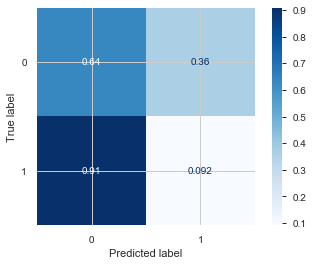

In [43]:
plot_confusion_matrix(classifier_rf,
                      X_test,
                      y_true=y_test,
                      normalize='true', cmap='Blues')

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, df_test['pred_rf'])
print(auc(fpr, tpr))

0.3636670479253381


__The AUC-ROC of the non-tuned RF classifier is terrible. It points to the following possibilities:__
- our features do not explain offer completion enough
- the hyperparamer values chosen for the baseline model are not good for our problem/data
- the confusion matrices on training and test data show overfitting. This shows that our model is not generalising well. We can address this by using cross validation.
We can clarify the above by fitting a balanced RF classifier via randomsearch CV. 

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
No handles with labels found to put in legend.


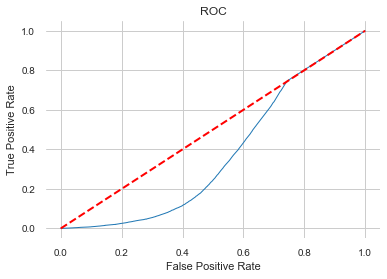

In [45]:
pred_probs = classifier_rf.predict_proba(X_test)
plot_roc_curve(y_test, pred_probs[:, 1])

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Feature importances. RF')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

<BarContainer object of 9 artists>

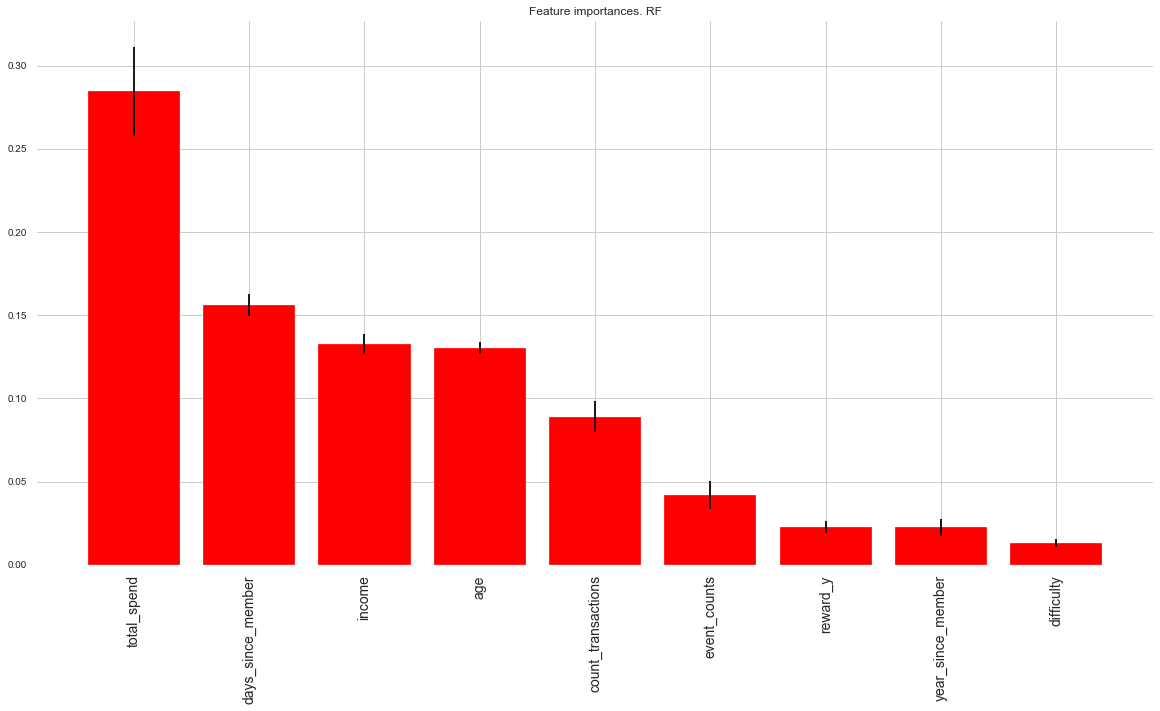

In [46]:
plot_top_n = 10

features = list(X_train.columns.values)
importances = classifier_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:plot_top_n-1]
features = [features[index] for index in indices]

plt.figure(figsize=[20, 10])
plt.title("Feature importances. RF")
plt.xticks(rotation=90, fontsize=14)
plt.bar(features,
        importances[indices],
        color="r",
        yerr=std[indices],
        align="center",)

### with hyperparameter tuning, with balanced classifier

In [47]:
classifier_rf_balanced = train_rf(X_train,
                                  y_train,
                                  X_test,
                                  y_test,
                                  use_random_search=True,
                                  use_balanced_classifier=True,)

df_train['pred_rf_b'] = classifier_rf_balanced.predict(X_train)
df_test['pred_rf_b'] = classifier_rf_balanced.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.2min finished


best estimator from random search: 
BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=3, max_features=5,
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_samples_leaf=1,
                               min_samples_split=5,
                               min_weight_fraction_leaf=0.0, n_estimators=200,
                               n_jobs=None, oob_score=True, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)


In [48]:
# train performance
print(classification_report(y_train, df_train['pred_rf_b']))
print(confusion_matrix(y_train, df_train['pred_rf_b']))

# test performance
print(classification_report(y_test, df_test['pred_rf_b']))
print(confusion_matrix(y_test, df_test['pred_rf_b']))

              precision    recall  f1-score   support

           0       0.87      0.40      0.55     65569
           1       0.32      0.82      0.46     22733

    accuracy                           0.51     88302
   macro avg       0.60      0.61      0.51     88302
weighted avg       0.73      0.51      0.53     88302

[[26520 39049]
 [ 4031 18702]]
              precision    recall  f1-score   support

           0       0.87      0.41      0.55     28132
           1       0.32      0.82      0.46      9711

    accuracy                           0.51     37843
   macro avg       0.59      0.61      0.51     37843
weighted avg       0.73      0.51      0.53     37843

[[11450 16682]
 [ 1756  7955]]


The improvement in prediction power of the model is clear here. 
- The F1-score is respectable overall
- No overfitting. Train and test set evaluations are fairly similar. This provides us confidence of model's reliability against unseen data. 

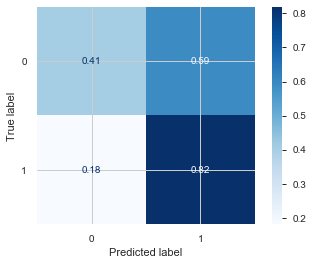

In [49]:
plot_confusion_matrix(classifier_rf_balanced,
                      X_test,
                      y_true=y_test,
                      normalize='true', cmap='Blues')

0.6130919716593279


No handles with labels found to put in legend.


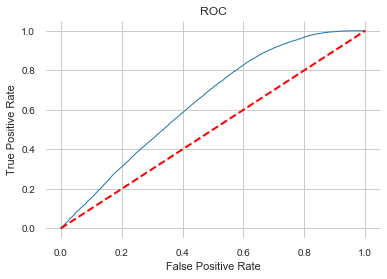

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, df_test['pred_rf_b'])
print(auc(fpr, tpr))

pred_probs = classifier_rf_balanced.predict_proba(X_test)
plot_roc_curve(y_test, pred_probs[:, 1])

The fine tuned and balanced RF model also provides a better AUC-ROC than our benchmark. An AUC of 0.6 is much better and practical than the non-targeted approach of assuming all customers will complete all offers. 


We should also note that there is potential room for improvement in model quality with respect to AUC. 
- Maybe we could come up with features that explain the offer completion a bit better
- Since, our problem statement constrains itself to historical data -- features like time lapsed since an offer is received are not really useful as our purpose is to figure out which customers to send out offers to. 

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Feature importances. RF')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

<BarContainer object of 9 artists>

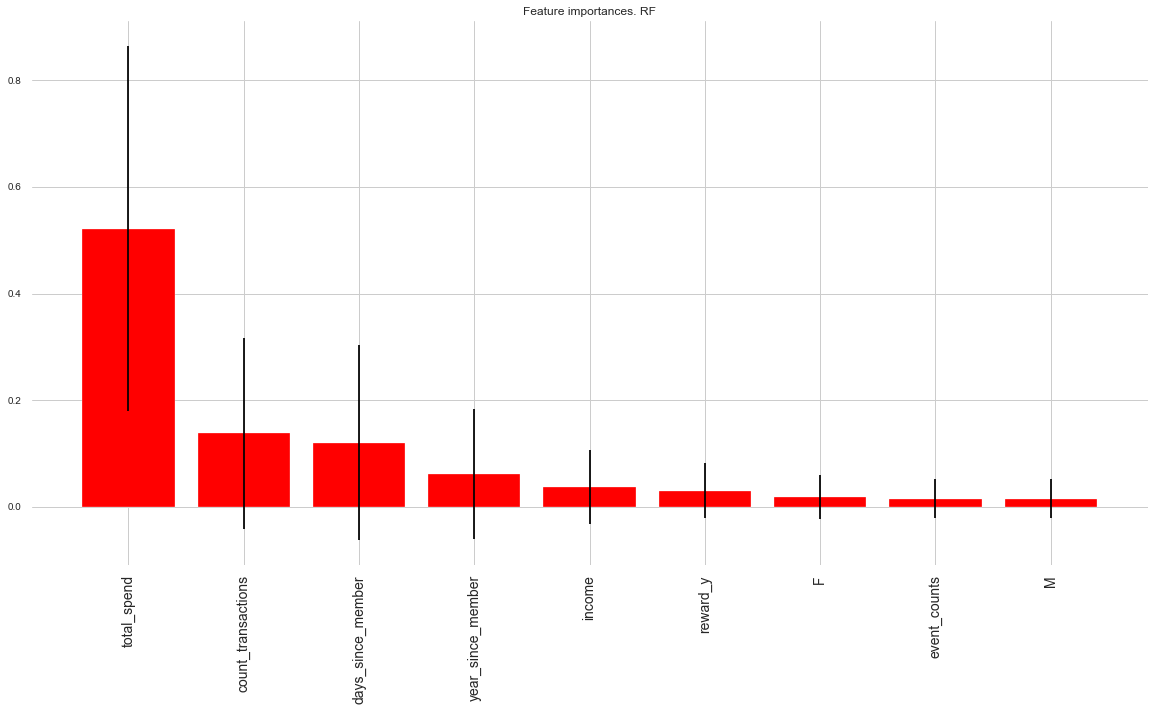

In [51]:
plot_top_n = 10

features = list(X_train.columns.values)
importances = classifier_rf_balanced.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_rf_balanced.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:plot_top_n-1]
features = [features[index] for index in indices]

plt.figure(figsize=[20, 10])
plt.title("Feature importances. RF")
plt.xticks(rotation=90, fontsize=14)
plt.bar(features,
        importances[indices],
        color="r",
        yerr=std[indices],
        align="center",)

The above graph nicely explains the relative feature importance along with their respective variance. We are only plotting the top 10 features for visual clarity. 

## ToDos

- [x] Fix the completed/not completed labelling 
- [x] Analyse target variable with features
- [x] Make a benchmark by a naive approach: mark all as completed
- [X] feature importance 

In [53]:
df_test['pred_benchmark'] = 1

In [54]:
print(classification_report(y_test, df_test['pred_benchmark']))
print(confusion_matrix(y_test, df_test['pred_benchmark']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28132
           1       0.26      1.00      0.41      9711

    accuracy                           0.26     37843
   macro avg       0.13      0.50      0.20     37843
weighted avg       0.07      0.26      0.10     37843

[[    0 28132]
 [    0  9711]]


In [55]:
fpr, tpr, thresholds = roc_curve(y_test, df_test['pred_benchmark'])
print(auc(fpr, tpr))

0.5


## Findings

### Problem statement
Given a customer ID and an offer ID, predict if that combination is likely to result in an __offer completion using customer's historical data with Starbucks__. Since `informationals` do not have offer completion as such, it is not part of this analysis. Our focus is on completion of `BOGO` and `discount` offers. 

__Our objective__ is to figure out which customers to send out a particular offer to. This would mean that we plan to use our model before sending out an offer, which limits the availability of features like transcript reward and transcript time. We can however exploit the vast customer history available with Starbucks. We can use aggregated features like transations (number and value), time length of a cutomer's relationship with Starbucks etc. to improve upon a naive approach.

### Data preparation
Since, the problem statements focuses on combinations of customers and offers, we prepare a dataset capturing these interactions.  
Below are some addiional features that we are using for our analysis: 
- `count_transactions`: 
- `total_spend`: how much a customer has spent historically [`person`]
- `total_reward`: how much a customer has collected in rewards from a certain `offer ID` [`person`, `offer_id`]
- `event_counts`: how many times a customer has had certain kind of events with an `offer ID`
- `year since member`
- `days since member`



### Results
Our fine tuned model improves upon the benchmark by 10 percentage points in terms of AUC (area under curve) of ROC (receiver operating characteristics). While the AUC itself has potential room for improvement as highlighted above, the model generalises really well across training and test data. This makes the model a significant improvement for improving upon the current approach of sending out offers randomly/always.  

#### Model generalises across training and test data
```
              precision    recall  f1-score   support

           0       0.87      0.40      0.55     65569
           1       0.32      0.82      0.46     22733

    accuracy                           0.51     88302
   macro avg       0.60      0.61      0.51     88302
weighted avg       0.73      0.51      0.53     88302

[[26520 39049]
 [ 4031 18702]]
              precision    recall  f1-score   support

           0       0.87      0.41      0.55     28132
           1       0.32      0.82      0.46      9711

    accuracy                           0.51     37843
   macro avg       0.59      0.61      0.51     37843
weighted avg       0.73      0.51      0.53     37843
```

#### Area under curve 
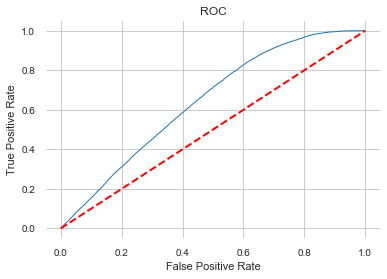
